In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
data = pd.read_csv('/Users/Arowolo/OneDrive/Desktop/loreon058/SMA EA/TSLA.csv')
data = data.set_index(pd.DatetimeIndex(data['Date']))
data = data.drop('Date', axis=1)

In [19]:
price = pd.DataFrame(data.iloc[1500:,3],columns=['Close'])

In [14]:
# create 20 days simple moving average column
price['20_SMA'] = price['Close'].rolling(window = 20, min_periods = 1).mean()

# create 50 days simple moving average column
price['50_SMA'] = price['Close'].rolling(window = 100, min_periods = 1).mean()


In [15]:
price['Signal'] = 0.0
price['Signal'] = np.where(price['20_SMA'] > price['50_SMA'], 1.0, 0.0)

In [16]:
price['Position'] = price['Signal'].diff()
# display first few rows
price.head()

,Close,20_SMA,50_SMA,Signal,Position
Date,,,,,
2016-06-14,214.960007,214.960007,214.960007,0.0,NaN
2016-06-15,217.699997,216.330002,216.330002,0.0,0.0
2016-06-16,217.929993,216.863332,216.863332,0.0,0.0
2016-06-17,215.470001,216.514999,216.514999,0.0,0.0
2016-06-20,219.699997,217.151999,217.151999,0.0,0.0


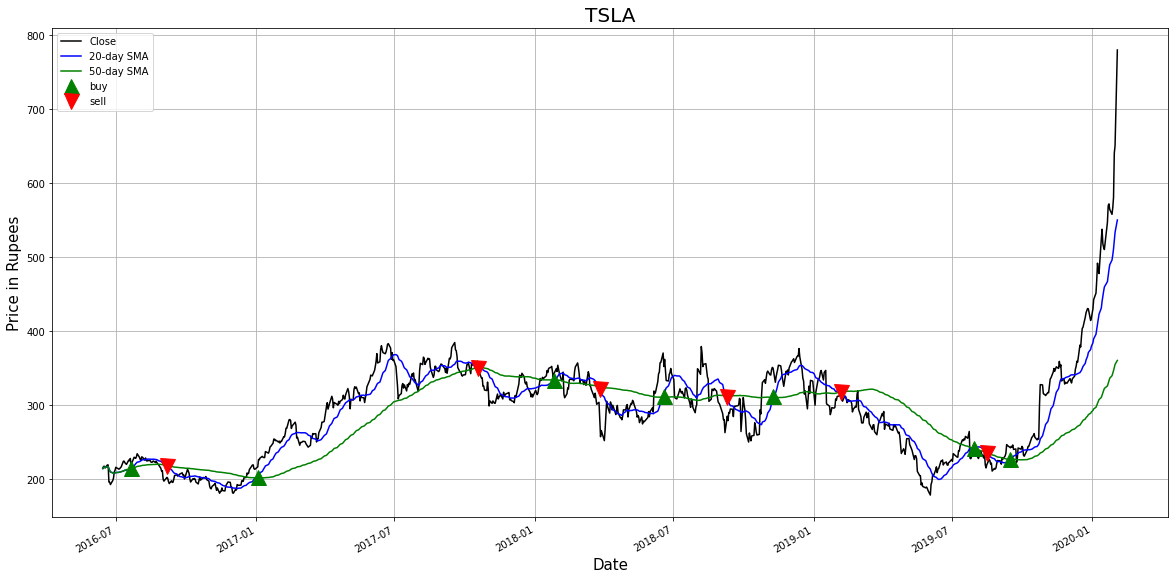

In [17]:
plt.figure(figsize = (20,10))

# plot close price, short-term and long-term moving averages 
price['Close'].plot(color = 'k', label= 'Close') 
price['20_SMA'].plot(color = 'b',label = '20-day SMA') 
price['50_SMA'].plot(color = 'g', label = '50-day SMA')

# plot 'buy' signals
plt.plot(price[price['Position'] == 1].index, 
         price['20_SMA'][price['Position'] == 1], 
         '^', markersize = 15, color = 'g', label = 'buy')

# plot 'sell' signals
plt.plot(price[price['Position'] == -1].index, 
         price['20_SMA'][price['Position'] == -1], 
         'v', markersize = 15, color = 'r', label = 'sell')

plt.ylabel('Price in Rupees', fontsize = 15 )
plt.xlabel('Date', fontsize = 15 )
plt.title('TSLA', fontsize = 20)
plt.legend()
plt.grid()
plt.show()